In [2]:
from torchvision.datasets import MNIST

train_dataset = MNIST(root='MNIST')
len(train_dataset)

60000

In [3]:
test_dataset = MNIST(root='MNIST',train = False)
len(test_dataset)

10000

<PIL.Image.Image image mode=L size=28x28 at 0x7FE383E80460>


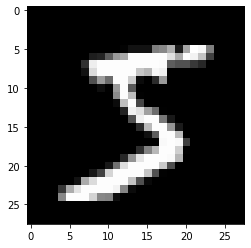

In [4]:
import matplotlib.pyplot as plt

image,label = train_dataset[0]

print(image)
plt.imshow(image,cmap = 'gray')

In [5]:
import torchvision.transforms as transforms

train_dataset = MNIST(root='MNIST',transform = transforms.ToTensor())
print(train_dataset[0])

test_dataset = MNIST(root='MNIST',train = False,transform = transforms.ToTensor())
print(test_dataset[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

tensor([[[0.0000, 0.0667, 0.2588, 0.0549, 0.2627],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]])


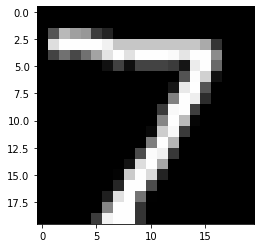

In [6]:
img_tensor = test_dataset[0][0]
print(img_tensor[:,10:15,10:15])

plt.imshow(img_tensor[0,5:25,5:25],cmap = 'gray')

In [7]:
import numpy as np

def split_indices(dataset_len,val_percent):
    validation_n = int(dataset_len*val_percent)
    indx = np.random.permutation(dataset_len)
    # first - train_indx, second - val_indx
    return indx[validation_n:],indx[:validation_n]

In [8]:
train_indices, val_indices = split_indices(len(train_dataset),0.2)

In [9]:
from torch.utils.data import TensorDataset, DataLoader,SubsetRandomSampler

batch_size_ = 100

train_loader = DataLoader(train_dataset,
                          batch_size= batch_size_,
                          shuffle = False,
                          sampler=SubsetRandomSampler(train_indices))
val_loader = DataLoader(train_dataset,
                        batch_size= batch_size_,
                        shuffle = False,
                        sampler=SubsetRandomSampler(val_indices))


In [10]:
for x_batch,y_batch in train_loader:
    print(x_batch)
    print(y_batch)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [11]:
from torch.nn import Linear


input_size = 28*28
output_size = 10 #num of classes
model = Linear(input_size,output_size)

In [12]:
print(model.weight.shape)
print(model.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [13]:
from torch.nn import Module

class MnistModel(Module):
    def __init__(self,input_size,output_size):
        super().__init__()
        self.linear = Linear(input_size,output_size)
    
    def forward(self,xb):
        xb = xb.reshape(-1,input_size)
        out = self.linear(xb)
        return out

In [51]:
model = MnistModel(input_size,output_size)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.0021, -0.0171, -0.0191,  ..., -0.0232, -0.0290, -0.0330],
        [-0.0057, -0.0035,  0.0248,  ..., -0.0211,  0.0102,  0.0125],
        [-0.0018,  0.0126,  0.0250,  ..., -0.0300, -0.0211, -0.0283],
        ...,
        [ 0.0237, -0.0130, -0.0094,  ..., -0.0355,  0.0007, -0.0274],
        [-0.0230, -0.0293,  0.0051,  ..., -0.0225, -0.0334,  0.0100],
        [-0.0145,  0.0250, -0.0172,  ..., -0.0058,  0.0308, -0.0276]],
       requires_grad=True), Parameter containing:
tensor([-0.0324, -0.0339, -0.0110,  0.0114, -0.0009,  0.0018, -0.0295, -0.0072,
        -0.0053, -0.0294], requires_grad=True)]


In [41]:
for images,labels in train_loader:
    outputs = model(images)
    break

print(outputs.shape)
#print(images)
#print(images.shape)
print(outputs)

torch.Size([100, 10])
tensor([[ 8.5305e-02, -3.0980e-01, -3.0712e-01, -5.0576e-01, -4.3462e-01,
          1.7572e+00, -7.4704e-01, -1.0988e-01,  3.4885e-01,  7.4102e-02],
        [-1.0485e+00, -1.0726e+00,  1.0217e+00,  1.9521e+00,  3.3823e-01,
          3.2633e-01, -1.2572e+00, -1.8939e+00,  1.5188e+00, -3.9569e-02],
        [ 2.7133e-01, -1.8672e+00,  5.8030e-01,  4.7842e-01,  6.2726e-01,
          2.1675e-01, -6.9231e-01, -1.7358e+00,  1.2627e+00, -2.5646e-02],
        [ 3.6055e+00, -2.7421e+00, -4.5432e-01,  1.2927e+00, -7.1310e-01,
          1.5217e+00, -6.7042e-01, -1.0093e+00,  3.1304e-01, -1.1082e+00],
        [ 6.8271e-01, -1.7582e+00,  2.7119e+00,  1.0116e+00,  1.5134e-01,
          2.7960e-01,  1.0243e+00, -2.0363e+00, -2.0012e-01, -1.4785e+00],
        [ 5.6043e-01, -1.5762e+00,  2.7956e-01, -1.7498e+00,  1.8596e+00,
         -7.6578e-01,  1.0213e+00,  2.3712e-01, -2.6030e-01,  5.9124e-01],
        [-1.1694e+00,  5.2937e-01,  2.9554e+00,  8.7621e-01, -1.4135e+00,
         -

In [29]:
from torch.nn.functional import softmax

probs = softmax(outputs, dim = 1)

print(probs)

tensor([[0.1280, 0.1313, 0.1067, 0.0842, 0.0851, 0.1046, 0.0684, 0.0966, 0.0964,
         0.0987],
        [0.1152, 0.1337, 0.0953, 0.0735, 0.1260, 0.0783, 0.0888, 0.0963, 0.0928,
         0.1000],
        [0.1364, 0.0935, 0.0875, 0.1046, 0.1216, 0.1133, 0.0860, 0.0825, 0.0830,
         0.0916],
        [0.1164, 0.1311, 0.0936, 0.0695, 0.1251, 0.1124, 0.0744, 0.0973, 0.1139,
         0.0663],
        [0.1232, 0.1389, 0.0811, 0.0670, 0.1198, 0.1039, 0.0871, 0.0709, 0.1139,
         0.0941],
        [0.1090, 0.1145, 0.1055, 0.0600, 0.0962, 0.1265, 0.0729, 0.0943, 0.1303,
         0.0909],
        [0.1104, 0.1147, 0.0924, 0.0850, 0.1220, 0.1171, 0.0934, 0.0806, 0.0965,
         0.0877],
        [0.0931, 0.1157, 0.1099, 0.0838, 0.1211, 0.1069, 0.0961, 0.0952, 0.0938,
         0.0845],
        [0.1054, 0.1014, 0.0993, 0.1004, 0.1175, 0.1171, 0.0677, 0.0855, 0.1126,
         0.0933],
        [0.1423, 0.1076, 0.1023, 0.0823, 0.1094, 0.1022, 0.0721, 0.0759, 0.1267,
         0.0792],
        [0

In [17]:
import torch
max_probs, pred = torch.max(probs,dim =1)
print(max_probs, pred )

tensor([0.1317, 0.1320, 0.1263, 0.1256, 0.1533, 0.1273, 0.1366, 0.1310, 0.1532,
        0.1536, 0.1534, 0.1280, 0.1232, 0.1340, 0.1594, 0.1278, 0.1243, 0.1261,
        0.1247, 0.1631, 0.1166, 0.1419, 0.1229, 0.1118, 0.1366, 0.1343, 0.1201,
        0.1438, 0.1400, 0.1173, 0.1210, 0.1521, 0.1144, 0.1324, 0.1139, 0.1568,
        0.1750, 0.1223, 0.1179, 0.1466, 0.1122, 0.1226, 0.1240, 0.1610, 0.1213,
        0.1256, 0.1137, 0.1394, 0.1234, 0.1204, 0.1409, 0.1220, 0.1274, 0.1475,
        0.1473, 0.1427, 0.1084, 0.1435, 0.1481, 0.1344, 0.1198, 0.1450, 0.1159,
        0.1546, 0.1388, 0.1518, 0.1321, 0.1265, 0.1464, 0.1197, 0.1253, 0.1477,
        0.1122, 0.1270, 0.1368, 0.1369, 0.1703, 0.1331, 0.1250, 0.1260, 0.1293,
        0.1405, 0.1274, 0.1181, 0.1243, 0.1388, 0.1369, 0.1170, 0.1264, 0.1470,
        0.1295, 0.1289, 0.1240, 0.1381, 0.1411, 0.1354, 0.1283, 0.1370, 0.1270,
        0.1276], grad_fn=<MaxBackward0>) tensor([0, 9, 5, 0, 0, 0, 0, 9, 5, 9, 0, 0, 9, 6, 9, 9, 0, 9, 0, 0, 0, 5, 9, 5,

In [52]:
def accuracy(lbl_pred,lbl_true):
    return torch.sum(lbl_pred==lbl_true) / len(lbl_pred)

In [53]:
from torch.nn.functional import cross_entropy
from torch.optim import SGD
opt = SGD(model.parameters(), lr = 0.001)

n_epochs = 10
for epoch in range(n_epochs):
    for images,labels in train_loader:
        opt.zero_grad()
        y_pred = model(images)
        probs = softmax(y_pred, dim = 1)
        max_probs, pred = torch.max(probs,dim =1)
        loss = cross_entropy(y_pred,labels)
        accuracy_ = accuracy(pred,labels)
        loss.backward()
        opt.step()
        print(f'Accuracy {epoch+1}/{n_epochs} : {accuracy_}')

Accuracy 1/10 : 0.11999999731779099
Accuracy 1/10 : 0.14000000059604645
Accuracy 1/10 : 0.11999999731779099
Accuracy 1/10 : 0.1599999964237213
Accuracy 1/10 : 0.14000000059604645
Accuracy 1/10 : 0.10999999940395355
Accuracy 1/10 : 0.12999999523162842
Accuracy 1/10 : 0.1599999964237213
Accuracy 1/10 : 0.1599999964237213
Accuracy 1/10 : 0.1599999964237213
Accuracy 1/10 : 0.09000000357627869
Accuracy 1/10 : 0.20999999344348907
Accuracy 1/10 : 0.1599999964237213
Accuracy 1/10 : 0.09000000357627869
Accuracy 1/10 : 0.18000000715255737
Accuracy 1/10 : 0.11999999731779099
Accuracy 1/10 : 0.07000000029802322
Accuracy 1/10 : 0.11999999731779099
Accuracy 1/10 : 0.11999999731779099
Accuracy 1/10 : 0.18000000715255737
Accuracy 1/10 : 0.10000000149011612
Accuracy 1/10 : 0.11999999731779099
Accuracy 1/10 : 0.2199999988079071
Accuracy 1/10 : 0.11999999731779099
Accuracy 1/10 : 0.23000000417232513
Accuracy 1/10 : 0.10000000149011612
Accuracy 1/10 : 0.12999999523162842
Accuracy 1/10 : 0.1400000005960464

In [71]:
img, label = test_dataset[10]

def predict(model,img):
    output = model(img)
    probs = softmax(output, dim = 1)
    _, pred = torch.max(probs,dim =1)
    return pred.item()

print(predict(model,img),label)

0 0


In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth')